![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 3 - Brain Computer Interface (BCI)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/MainExerciseBCI.ipynb)

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [11]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

# 2. The BCI Data
**The original datasets (datasets 2a):**  
http://www.bbci.de/competition/iv/#dataset2a

#### Load and plot the dataset:

In [12]:
dData = np.load('BciData.npz')
mX    = dData['mX1']
vY    = dData['vY1']

mX.shape, vY.shape

((287, 1000, 22), (287,))

In [13]:
lLabel = ['Left hand', 'Right hand', 'Foot', 'Tongue'] #-- The labels

#-- N = Samples, T = Time, C = Channels
N, T, C = mX.shape
N, T, C

(287, 1000, 22)

#### Run the cell below several times

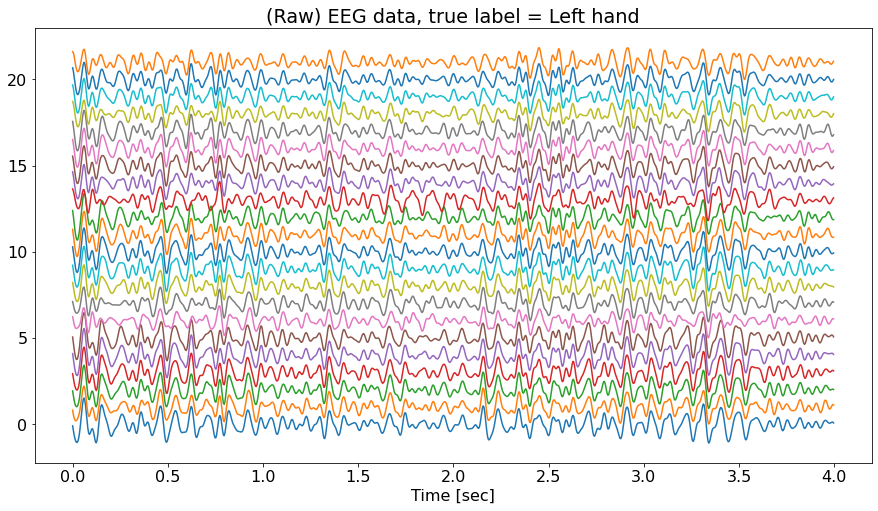

In [14]:
def PlotRandomSample(mX, vY):
    N, T, C = mX.shape #-- Samples, Time, Channels
    idx     = np.random.randint(N)
    mXi     = mX[idx,:,:].copy()
    yi      = vY[idx]
    
    #--  Just for plotting:
    mXi -= mXi.mean(0)
    mXi /= 20
    mXi += np.arange(C)[None,:]
    vT   = np.linspace(0, 4, T, endpoint=False)
    
    plt.figure(figsize=(15, 8))
    plt.plot  (vT, mXi)
    plt.title (f'(Raw) EEG data, true label = {lLabel[yi]}')
    plt.xlabel('Time [sec]')

PlotRandomSample(mX, vY)
plt.show()

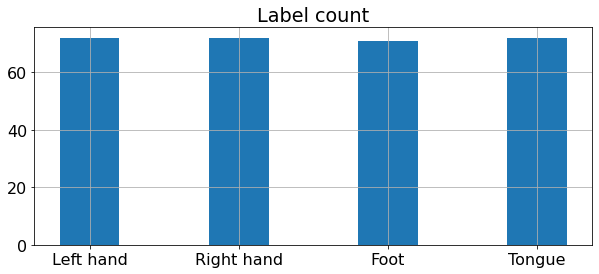

array([72, 72, 71, 72], dtype=int64)

In [15]:
plt.figure(figsize=(10, 4))
plt.hist  (vY, bins=4, range=[-.5, 3.5], rwidth=.4)
plt.title ('Label count')
plt.xticks(range(4), lLabel, rotation=0,  ha='center')
plt.grid  ()
plt.show  ()

np.unique(vY, return_counts=True)[1]

### Exercise 1
* Get above 30% accuracy (with leave-one-out cross validation).

In [16]:
#-- Your code:
mX.shape

(287, 1000, 22)

In [17]:
mX2 = mX.reshape(-1, T * C)
mX2.shape

(287, 22000)

In [18]:
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold

lModels  = []
lModels += [(SVC                   (C=1), 'SVM'                 )]
lModels += [(LogisticRegression    (),    'Logistic Regression' )]
lModels += [(KNeighborsClassifier  (),    'KNN'                )]
lModels += [(DecisionTreeClassifier(),    'Tree'               )]

for (oClassifier, name) in lModels:
    vHatY    = cross_val_predict(oClassifier, mX2, vY)
    accuracy = np.mean(vY == vHatY)
    print(f'{name:19s} = {100*accuracy:2.2f}%')

SVM                 = 39.37%


C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression = 25.44%
KNN                 = 24.04%
Tree                = 25.78%


### Exercise 2
Apply the following steps:
1. For each sample $\boldsymbol{X}_{i}\in\mathbb{R}^{1000\times22}$, compute the covariance matrix $\boldsymbol{C}_{i}\in\mathbb{R}^{22\times22}$ (use `np.cov`).
2. Set $\boldsymbol{c}_{i}\in\mathbb{R}^{22^{2}}$ as the columns tack version of each $\boldsymbol{C}_{i}\in\mathbb{R}^{22\times22}$ (use `np.reshape`).
3. For visualization, apply dimensionality reduction (color each point according to the label `vY`):
    * PCA
    * MDS
    * t-SNE
    * UMAP
4. Using $\boldsymbol{c}_{i}$, get above 60% accuracy.

In [19]:
# 1. Compute the covariance matrix

# calculate for a single vector

mX0 = mX[0]
print(mX0.shape)
mcovX0 = np.cov(mX0.T)
print(mcovX0.shape)
vcovX0 = mcovX0.reshape(C * C)
print(vcovX0.shape)

(1000, 22)
(22, 22)
(484,)


In [20]:
# 2. build the output matrix

def calc_cov(mx):
    return np.cov(mx.T).reshape(C * C)

# the output shoule be (N, C * C)
mcov = np.array([calc_cov(xi) for xi in mX])

# double check
print(mcov.shape)
print(np.array_equal(mcov[0], vcovX0))


(287, 484)
True


In [21]:
# 3. Visulaise the mainfolds

# https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

from collections import OrderedDict
from functools import partial

import matplotlib.pyplot as plt

from matplotlib.ticker     import NullFormatter
from sklearn.decomposition import PCA
from sklearn.manifold      import MDS, TSNE
from umap                  import UMAP

from sklearn import manifold, datasets

n_neighbors = 10
n_components = 2

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['PCA'] = PCA(n_components=n_components)
methods['UMAP'] = UMAP(n_components=n_components)
                                 


C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
def plot_mainfolds(methods, rows=2, cols=4, ):
    for i, (label, method) in enumerate(methods.items()):
        Y = method.fit_transform(mcov)
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.scatter(Y[:, 0], Y[:, 1], c=vY)
        ax.set_title("%s" % (label))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.tight_layout()
    plt.show()

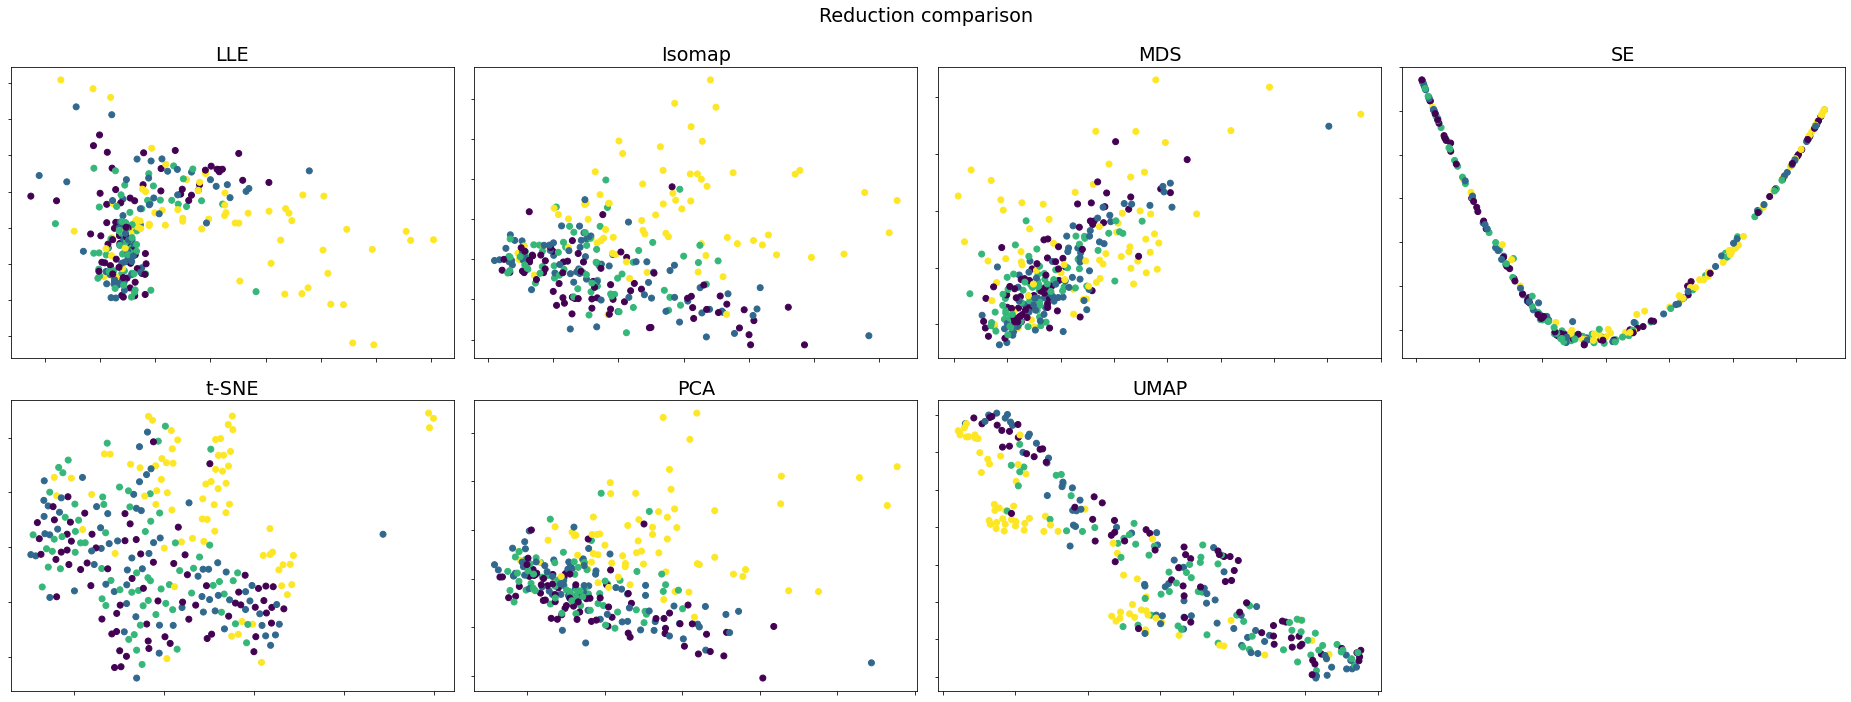

In [23]:
# Create figure
fig = plt.figure(figsize=(26, 10))
fig.suptitle("Reduction comparison")

plot_mainfolds(methods)

In [24]:
# 4. predict using the covariance matrix
vHatY = cross_val_predict(SVC(C=10), mcov, vY, cv = KFold(N, shuffle=True))
accuracy = np.mean(vY == vHatY)
print(f'{100*accuracy:2.2f}%')


64.46%


### Exercise 3
`SpdMetric` is a useful metric between two covariance matrices:
$$d\left(\boldsymbol{C}_{i},\boldsymbol{C}_{j}\right)=\sqrt{\sum_{i=1}^{d}\log^{2}\left(\lambda_{i}\left(\boldsymbol{C}_{i}^{-1}\boldsymbol{C}_{j}\right)\right)}$$

1. Implement the function `SpdMetricAux` below.    
The function gets the vectors $\boldsymbol{c}_{i}$ and $\boldsymbol{c}_{j}$.  
It reshapes them back to the two matrices $\boldsymbol{C}_{i}$ and $\boldsymbol{C}_{j}$ and returns $d\left(\boldsymbol{C}_{i},\boldsymbol{C}_{j}\right)$
2. Apply dimensionality reduction using the new metric:
    * MDS
    * t-SNE
    * UMAP
3. Get above 85% accuracy!

In [25]:
from scipy.linalg import eigvalsh

def SpdMetric(mC1, mC2):
    
    vEig = eigvalsh(mC1, mC2)
    return np.sqrt(np.sum(np.log(vEig)**2))

In [26]:
# 1. implement the SpdMetricAux
def SpdMetricAux(vC1, vC2):
    mC1 = vC1.reshape(C, C)
    mC2 = vC2.reshape(C, C)
    return SpdMetric(mC1, mC2)

C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
C:\Users\eyalshw\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1727: UserWarning: custom distance metric does not return gradient; inverse_transf

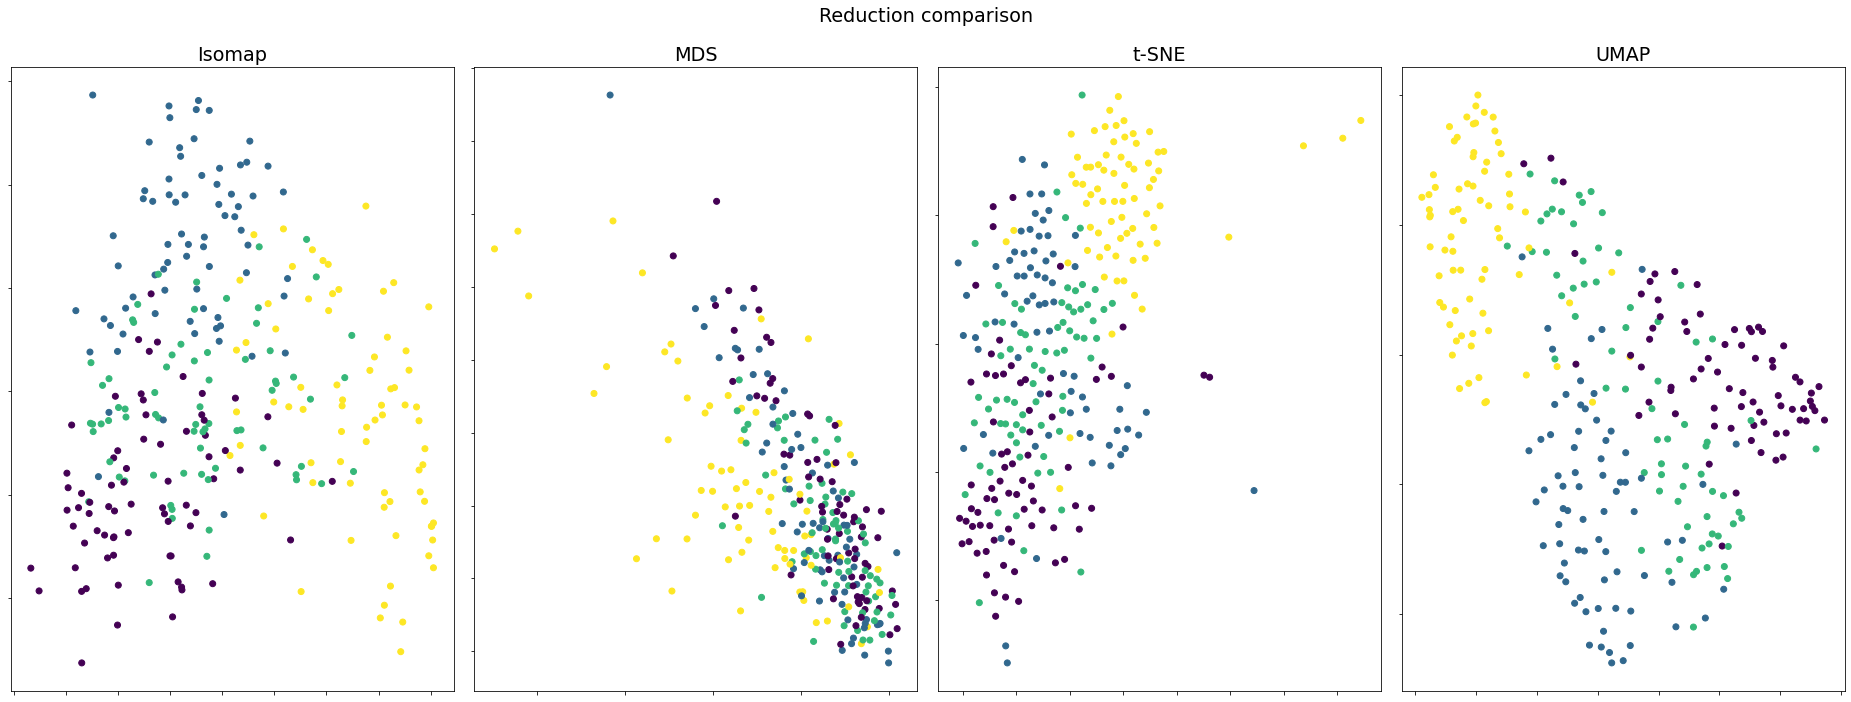

In [27]:
# 2. Apply dimensionality reduction using the new metric (mds, t-sne, umap)

# commening all the mainfold without metric option

methods = OrderedDict()
#LLE = partial(manifold.LocallyLinearEmbedding,
#              n_neighbors, n_components, eigen_solver='auto')
#methods['LLE'] = LLE(method='standard', metric=)
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components, metric=SpdMetricAux)
methods['MDS'] = manifold.MDS(n_components, metric=SpdMetricAux)
#methods['SE'] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors, metric=)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0, metric=SpdMetricAux)
#methods['PCA'] = PCA(n_components=n_components, metric=)
methods['UMAP'] = UMAP(n_components=n_components, metric=SpdMetricAux)

fig = plt.figure(figsize=(26, 10))
fig.suptitle("Reduction comparison")

plot_mainfolds(methods=methods, rows=1, cols=4)


In [28]:
# 3. Get above 85% accuracy!

# Try 1: trying with the classification that allows metric

vHatY = cross_val_predict(KNeighborsClassifier(metric=SpdMetricAux, weights='distance'), mcov, vY, cv = KFold(N, shuffle=True))
np.mean(vY == vHatY)

0.8083623693379791

In [34]:
# Use grid search to get better results
from sklearn.model_selection import GridSearchCV

grid_params =   {
    'n_neighbors': np.arange(3, 25, 4),
}

clf = GridSearchCV(KNeighborsClassifier(metric=SpdMetricAux, weights='distance'), grid_params, verbose=2)
clf.fit(mcov, vY,)
print(clf.best_estimator_)
print(clf.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=3; total time=   5.3s
[CV] END ......................................n_neighbors=3; total time=   5.0s
[CV] END ......................................n_neighbors=3; total time=   5.1s
[CV] END ......................................n_neighbors=3; total time=   5.1s
[CV] END ......................................n_neighbors=3; total time=   5.1s
[CV] END ......................................n_neighbors=7; total time=   5.1s
[CV] END ......................................n_neighbors=7; total time=   5.1s
[CV] END ......................................n_neighbors=7; total time=   5.0s
[CV] END ......................................n_neighbors=7; total time=   5.2s
[CV] END ......................................n_neighbors=7; total time=   5.0s
[CV] END .....................................n_neighbors=11; total time=   5.0s
[CV] END .....................................n_n